In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
filename = 'data_evaluacion.csv'
data = pd.read_csv(filename)
print (data.shape)
data.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


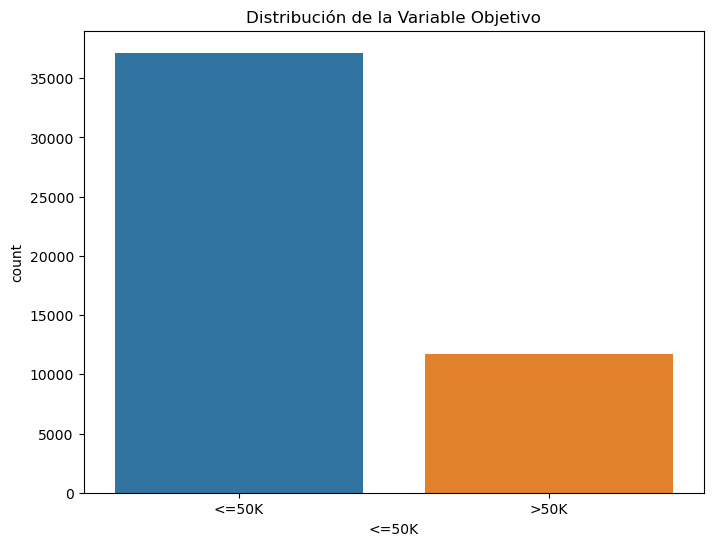

In [24]:
# Análisis exploratorio de datos (EDA)
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x=data.columns[-1], data=data)  # Última columna asume que es la variable objetivo
plt.title('Distribución de la Variable Objetivo')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


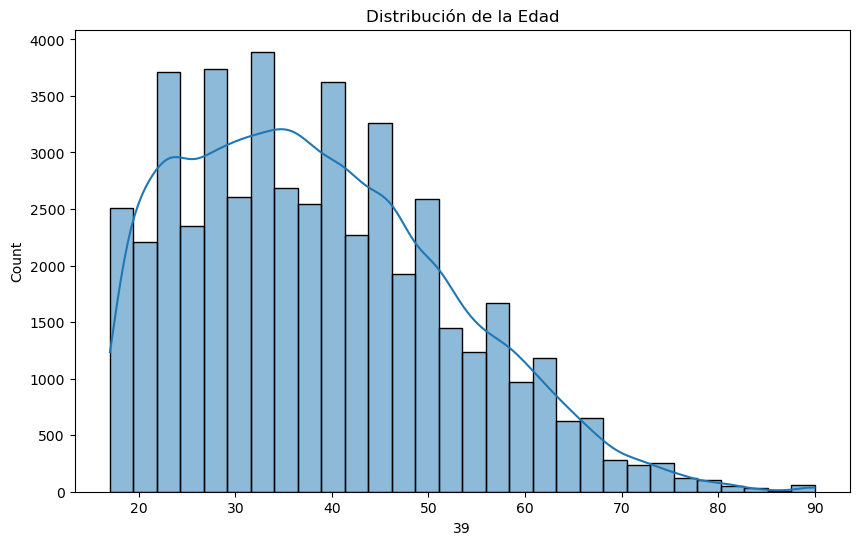

In [25]:
# Distribución de la edad (primer columna asume que es la edad)
plt.figure(figsize=(10, 6))
sns.histplot(data.iloc[:, 0], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


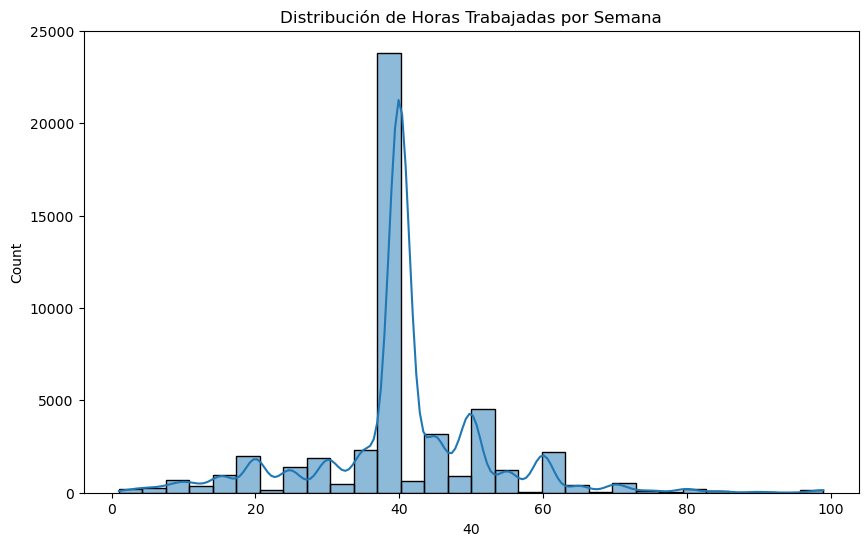

In [26]:
# Distribución de horas trabajadas por semana (columna 12)
plt.figure(figsize=(10, 6))
sns.histplot(data.iloc[:, 12], bins=30, kde=True)
plt.title('Distribución de Horas Trabajadas por Semana')
plt.show()

In [27]:
# Preprocesamiento de datos
# Codificación de variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

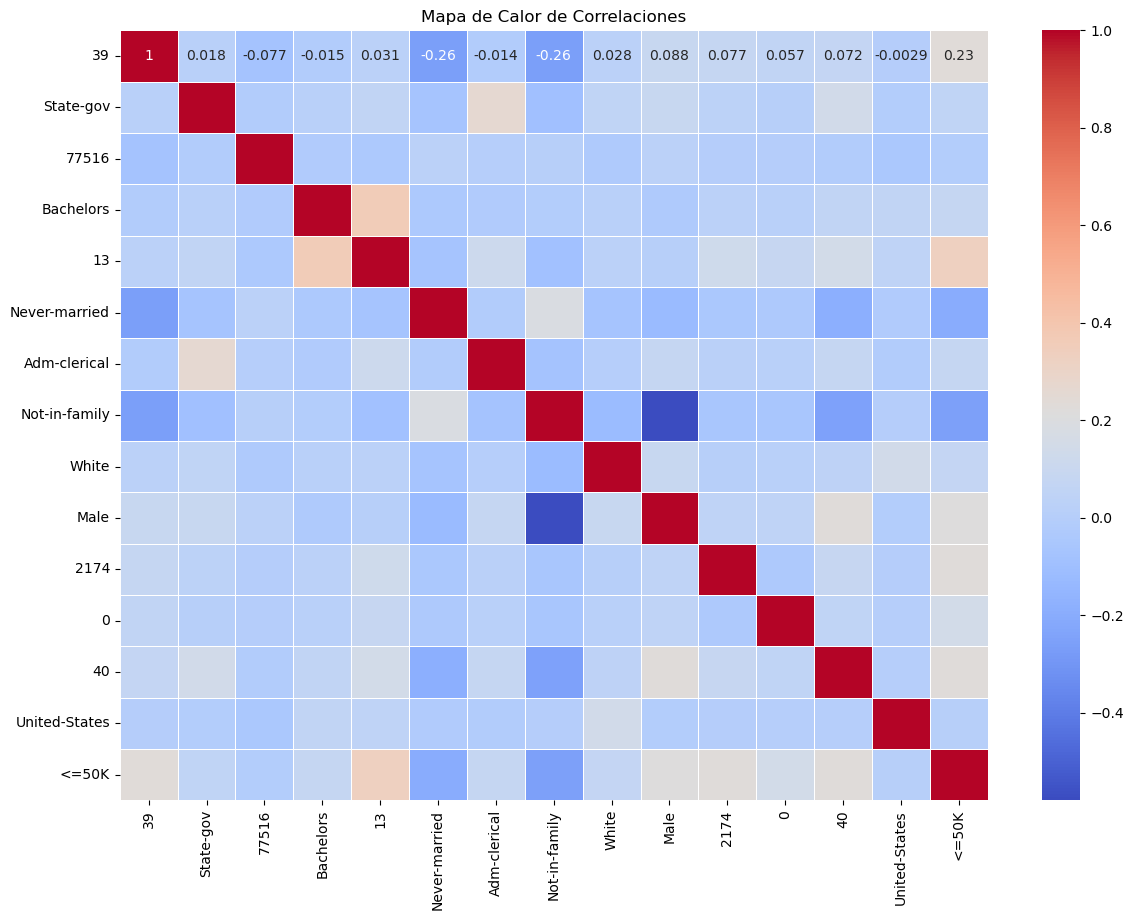

In [28]:
# Análisis de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [29]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64


In [30]:
# Dividir los datos en características y objetivo (última columna como objetivo)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [31]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Entrenar el modelo de Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

In [37]:
# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

In [38]:
# Evaluar el modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

In [39]:
print(f"\nPrecisión del modelo en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")
print("\nInforme de clasificación en el conjunto de entrenamiento:")
print(train_report)


Precisión del modelo en el conjunto de entrenamiento: 79.42%

Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     29690
           1       0.65      0.31      0.42      9382

    accuracy                           0.79     39072
   macro avg       0.73      0.63      0.65     39072
weighted avg       0.77      0.79      0.77     39072



In [40]:
print(f"\nPrecisión del modelo en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print("\nInforme de clasificación en el conjunto de prueba:")
print(test_report)


Precisión del modelo en el conjunto de prueba: 79.72%

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7464
           1       0.65      0.31      0.42      2305

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

